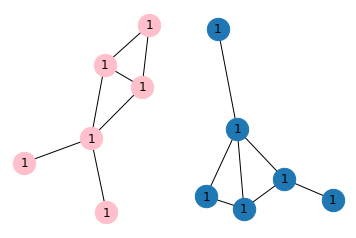

-----------init-----------
{1: '1', 2: '1', 3: '1', 4: '1', 5: '1', 6: '1'}
{1: '1', 2: '1', 3: '1', 4: '1', 5: '1', 6: '1'}
-------iteration 1 -------
[2, 2, 3, 4, 4, 5]
[2, 2, 3, 4, 4, 5]
Maybe isomorphism!!!
-------iteration 2 -------
[7, 7, 8, 11, 11, 12]
[6, 7, 9, 10, 11, 13]
Not isomorphism!!!
-------iteration 3 -------
[16, 16, 17, 20, 20, 22]
[14, 15, 18, 19, 21, 23]
Not isomorphism!!!
-------iteration 4 -------
[26, 26, 27, 30, 30, 32]
[24, 25, 28, 29, 31, 33]
Not isomorphism!!!
-------iteration 5 -------
[36, 36, 37, 40, 40, 42]
[34, 35, 38, 39, 41, 43]
Not isomorphism!!!
-------iteration 6 -------
[46, 46, 47, 50, 50, 52]
[44, 45, 48, 49, 51, 53]
Not isomorphism!!!
-------iteration 7 -------
[56, 56, 57, 60, 60, 62]
[54, 55, 58, 59, 61, 63]
Not isomorphism!!!
-------iteration 8 -------
[66, 66, 67, 70, 70, 72]
[64, 65, 68, 69, 71, 73]
Not isomorphism!!!
-------iteration 9 -------
[76, 76, 77, 80, 80, 82]
[74, 75, 78, 79, 81, 83]
Not isomorphism!!!
-------iteration 10 -------

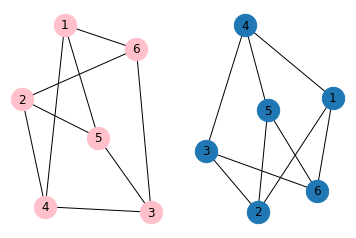

-----------init-----------
{1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6'}
{1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6'}
-------iteration 1 -------
[8, 10, 12, 13, 15, 17]
[7, 9, 11, 14, 16, 18]
Not isomorphism!!!
-------iteration 2 -------
[19, 21, 22, 24, 26, 29]
[20, 23, 25, 27, 28, 30]
Not isomorphism!!!
-------iteration 3 -------
[31, 33, 34, 36, 38, 41]
[32, 35, 37, 39, 40, 42]
Not isomorphism!!!
-------iteration 4 -------
[43, 45, 46, 48, 50, 53]
[44, 47, 49, 51, 52, 54]
Not isomorphism!!!
-------iteration 5 -------
[55, 57, 58, 60, 62, 65]
[56, 59, 61, 63, 64, 66]
Not isomorphism!!!
-------iteration 6 -------
[67, 69, 70, 72, 74, 77]
[68, 71, 73, 75, 76, 78]
Not isomorphism!!!
-------iteration 7 -------
[79, 81, 82, 84, 86, 89]
[80, 83, 85, 87, 88, 90]
Not isomorphism!!!
-------iteration 8 -------
[91, 93, 94, 96, 98, 101]
[92, 95, 97, 99, 100, 102]
Not isomorphism!!!
-------iteration 9 -------
[104, 106, 108, 109, 111, 113]
[103, 105, 107, 110, 112, 114]
Not isomorphism!!!

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
from builtins import str
    
def draw_graphs(G,G1):
    pos = nx.spring_layout(G)
    pos1 = nx.spring_layout(G1) 
    plt.subplot(121)
    nx.draw(G, pos, with_labels=True, node_color='pink', node_size=500)
    plt.subplot(122)
    nx.draw(G1, pos1, with_labels=True, node_size=500)
    plt.show()

def multiset_define(G): #复合集的生成与排序拼接,复合集value为邻居节点排序后标签
    multiset = {}
    lab = nx.get_node_attributes(G,'label')
    for u in G.nodes():  
        list = []
        a = nx.all_neighbors(G,u)     
        for v in a:
            list.append(lab[v])    
        list.sort()
        list_new = [str(x) for x in list]
        multiset[u] = ''.join(list_new)
    return multiset

def multiset_join(G,dict):    #把v上一轮的标签作为前缀，添加到s里
    node_label = nx.get_node_attributes(G,'label')
    for u in dict.keys():
        dict[u] = node_label[u] + dict[u]    
    return dict

#标签压缩，把G和G1的所有复合集升序排列，且按顺序标号
def label_compression(dict1,dict2,G,G1): 
    node_label = nx.get_node_attributes(G,'label')
    node_label1 = nx.get_node_attributes(G1,'label')
    result = map(int,node_label.values() )
    result1 = map(int, node_label1.values())
    n = max(max(result),max(result1)) + 1  #重标签起始数
    strings = [] #存放两个图标签集组合
    
    for v in dict1.values():   #将两个图的标签集集合起来
        strings.append(v)
    for u in dict2.values():
        strings.append(u)  
    str_remove = []   #存放去重以后的字符串列表
    for i in strings:
        if i not in str_remove:
            str_remove.append(i)  
    str_remove.sort()  #排序后的字符串列表     
    map_dict = {}     #给新标签顺次标号
    for m in range(len(str_remove)):
        map_dict[str_remove[m]] = str(n)
        n += 1 
    return map_dict

def label_update(dic,map_dict):
    for  u in dic.keys():
        for v in map_dict.keys():
            if(dic[u] == v):
                dic[u] = map_dict[v]
    return dic

def WL_test(dict1,dict2,G,G1): 
    i = 1
    list1 = dict1   #初始化标签复合集
    list2 = dict2
    print("-----------init-----------")
    print(list1)
    print(list2)
    while i<= 30:   #第i轮生成的标签集一样时，两图可能同构    
        print("-------iteration", i,"-------")
        list1 = multiset_define(G)
        list2 = multiset_define(G1)
        dict1 = multiset_join(G,list1)
        dict2 = multiset_join(G1,list2) #复合集排序，元素是邻居在上一轮迭代生成的标签集排序后拼接成的字符串
        map_dict = label_compression(dict1,dict2,G,G1) #标签压缩，生成映射字典
        list1 = label_update(dict1, map_dict)
        list2 = label_update(dict2, map_dict) #更新标签
        nx.set_node_attributes(G,list1,'label')
        nx.set_node_attributes(G1,list2,'label')
        result = sorted(map(int,list1.values()))
        result1 = sorted(map(int, list2.values()))
        print(result)
        print(result1)
        if result != result1:
            print("Not isomorphism!!!")
        else:
            print("Maybe isomorphism!!!")  
        i += 1
        

##################################################################
# draw_graphs_test()
G = nx.MultiGraph()   #有多重边无向图
G.add_node(1,label='1')  #添加节点
G.add_node(2,label='1')
G.add_node(3,label='1')
G.add_node(4,label='1')
G.add_node(5,label='1')
G.add_node(6,label='1')
edges = [(1,5),(2,5),(4,5),(3,4),(3,6),(4,6),(5,6)]
G.add_edges_from(edges)

G1 = nx.MultiGraph()   #有多重边无向图
G1.add_node(1,label='1')  #添加节点
G1.add_node(2,label='1')
G1.add_node(3,label='1')
G1.add_node(4,label='1')
G1.add_node(5,label='1')
G1.add_node(6,label='1')
edges1 = [(1,5),(2,4),(4,5),(3,5),(3,6),(4,6),(5,6)]
G1.add_edges_from(edges1)

pos = nx.spring_layout(G)
plt.subplot(121)
node_labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=False, node_color='pink', node_size=500)
nx.draw_networkx_labels(G, pos, labels = node_labels)

pos1 = nx.spring_layout(G1)
plt.subplot(122)
node_labels1 = nx.get_node_attributes(G1, 'label')
nx.draw(G1, pos1, with_labels=False, node_size=500)
nx.draw_networkx_labels(G1, pos1, labels = node_labels1)
plt.show()

WL_test(node_labels,node_labels1,G,G1)

##################################################################
Ga = nx.MultiGraph()   #有多重边无向图
Ga.add_node(1,label='1')  #添加节点
Ga.add_node(2,label='2')
Ga.add_node(3,label='3')
Ga.add_node(4,label='4')
Ga.add_node(5,label='5')
Ga.add_node(6,label='6')
edgesa = [(1,4),(1,5),(1,6),(2,4),(2,5),(2,6),(3,4),(3,5),(3,6)]
Ga.add_edges_from(edgesa)

Gb = nx.MultiGraph()   #有多重边无向图
Gb.add_node(1,label='1')  #添加节点
Gb.add_node(2,label='2')
Gb.add_node(3,label='3')
Gb.add_node(4,label='4')
Gb.add_node(5,label='5')
Gb.add_node(6,label='6')
edgesb = [(1,2),(2,3),(3,4),(4,5),(5,6),(6,1),(1,4),(2,5),(3,6)]
Gb.add_edges_from(edgesb)

posa = nx.spring_layout(Ga)
plt.subplot(121)
node_labelsa = nx.get_node_attributes(Ga, 'label')
nx.draw(Ga, posa, with_labels=False, node_color='pink', node_size=500)
nx.draw_networkx_labels(Ga, posa, labels = node_labelsa)

posb = nx.spring_layout(Gb)
plt.subplot(122)
node_labelsb = nx.get_node_attributes(Gb, 'label')
nx.draw(Gb, posb, with_labels=False, node_size=500)
nx.draw_networkx_labels(Gb, posb, labels = node_labelsb)
plt.show()

WL_test(node_labelsa,node_labelsb,Ga,Gb)
